In [1]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt
from matplotlib import cm

%matplotlib inline
params = {"ytick.color" : "c",
          "xtick.color" : "c",
          "axes.labelcolor" : "c",
          "axes.edgecolor" : "c",
         "text.color" : "c"}
plt.rcParams.update(params)#setup for dark theme

import pandas as pd
from numpy import linalg
from sklearn.decomposition import PCA
from sklearn import datasets


Zadanie 1. (4 punkty)<br>
a) Utwórz zestaw danych X składający się z 1000 wektorów dwuwymiarowych x i = (x 1i ,
x 2i ) T , dla i = 1, 2, ..., 1000, wygenerowanych losowo przy użyciu dwuwymiarowego
rozkładu normalnego o średniej [3, 5] i macierzy kowariancji [12, 3; 3, 1].


In [2]:
mu_a = [3,5]
sigma_a = [[12,3],[3,1]]
X_a = np.random.multivariate_normal(mu_a, sigma_a, 1000)
print(X_a)

[[-4.01532586  2.95815881]
 [ 1.5166969   3.46794991]
 [-0.05216041  4.28560901]
 ...
 [ 1.90307617  4.78568458]
 [ 3.07604791  4.63205191]
 [ 5.51783985  5.41954872]]


b) Ustandaryzuj dane, tak aby średnia dla każdego z wymiarów wynosiła 0, a wariancja 1.
Ustandaryzowane dane oznaczmy przez X (0) .

In [3]:
X_std = (X_a - X_a.mean(axis=0))/X_a.std(axis=0)
print(X_std)

[[-2.04207844 -2.10196059]
 [-0.45215768 -1.58596093]
 [-0.90305221 -0.75834386]
 ...
 [-0.34111106 -0.25217805]
 [-0.00399529 -0.40768176]
 [ 0.6977834   0.38940568]]


In [4]:
#sprawdzenie wyniku
print(X_std.std(axis=0), X_std.mean(axis=0))#jest supi

[1. 1.] [ 9.47797396e-16 -3.70231623e-15]


c) Policz macierz kowariancji S ustandaryzowanego zestawu danych X (0) .

In [5]:
print(np.shape(X_a))

(1000, 2)


In [6]:
cov_a = np.cov(X_a.T)
cov_std = np.cov(X_std.T)# z tego liczymy wartosci wlasne
print(cov_a,"\n",cov_std)


[[12.11857264  2.98967136]
 [ 2.98967136  0.97705763]] 
 [[1.001001   0.86970534]
 [0.86970534 1.001001  ]]


d) Wyznacz wartości własne λ 1 i λ 2 oraz odpowiadające im wektory własne v 1 i v 2
macierzy kowariancji S. Dla ustalenia notacji, wartości własne porządkujemy malejąco,
tzn. λ 1 > λ 2 .

In [7]:
val, vec = np.linalg.eig(cov_std)
print(f'eigenvalues \n{val}\neigenvectors \n{vec}')

eigenvalues 
[1.87070634 0.13129566]
eigenvectors 
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


In [8]:
print(vec[0].T)

[ 0.70710678 -0.70710678]


e) Wyznacz składowe główne zestawu danych, tzn. dla każdego punktu danych x i(0)
wyznacz punkt y i = (1/sqrt(λ 1 ) v 1T x i(0) , 1/sqrt(λ 2 ) v 2T x i(0) ) T . Odpowiada to zrzutowaniu
punktu x i(0) na osie nowego układu współrzędnych wyznaczonego przez wektory własne
macierzy S i przeskalowaniu przez pierwiastki z wartości własnych.

In [9]:
y = np.array([1/np.sqrt(val[0])*(vec[0] @ X_std.T), 
               1/np.sqrt(val[1])*(vec[1] @ X_std.T)]).T
print(y)#glowne skladowe - pca
y2 = np.dot(X_std, np.dot(vec, np.diag(1 / np.sqrt(val))))
pca = PCA(n_components=2)
y3 = pca.fit_transform(X_std)#tu cos nie dziala

[[ 0.03095848 -8.08692947]
 [ 0.58616501 -3.97730846]
 [-0.07481278 -3.2421492 ]
 ...
 [-0.04597748 -1.15778041]
 [ 0.20870189 -0.80337161]
 [ 0.15942821  2.1216068 ]]


f) Zrób rysunki pokazujące oryginalny zbiór danych (punkty x i ), zbiór danych po
standaryzacji (punkty x i(0) ) i zbioru danych po przekształceniu PCA (punkty y i ). Na
rysunkach z punktami x i i x i(0) narysuj proste zawierające osie główne elipsy wyznaczanej
przez punkty danych.
g) Sprawdź charakte

In [10]:
x11 = X_a.mean(axis=0)[0] - mu_a[1] * vec[0][0] * X_a.std(axis=0)[0]
y11 = X_a.mean(axis=0)[0] + mu_a[1] * vec[0][0] * X_a.std(axis=0)[0]

x12 = X_a.mean(axis=0)[1] - mu_a[1] * vec[0][1] * X_a.std(axis=0)[1]
y12 = X_a.mean(axis=0)[1] + mu_a[1] * vec[0][1] * X_a.std(axis=0)[1]

x21 = X_a.mean(axis=0)[0] - mu_a[1] * vec[1][0] * X_a.std(axis=0)[0]
y21 = X_a.mean(axis=0)[0] + mu_a[1] * vec[1][0] * X_a.std(axis=0)[0]

x22 = X_a.mean(axis=0)[1] - mu_a[1] * vec[1][1] * X_a.std(axis=0)[1]
y22 = X_a.mean(axis=0)[1] + mu_a[1] * vec[1][1] * X_a.std(axis=0)[1]

x31 = X_std.mean(axis=0)[0] - mu_a[1] * vec[0][0] * X_std.std(axis=0)[0]
y31 = X_std.mean(axis=0)[0] + mu_a[1] * vec[0][0] * X_std.std(axis=0)[0]

x32 = X_std.mean(axis=0)[1] - mu_a[1] * vec[0][1] * X_std.std(axis=0)[1]
y32 = X_std.mean(axis=0)[1] + mu_a[1] * vec[0][1] * X_std.std(axis=0)[1]

x41 = X_std.mean(axis=0)[0] - mu_a[1] * vec[1][0] * X_std.std(axis=0)[0]
y41 = X_std.mean(axis=0)[0] + mu_a[1] * vec[1][0] * X_std.std(axis=0)[0]

x42 = X_std.mean(axis=0)[1] - mu_a[1] * vec[1][1] * X_std.std(axis=0)[1]
y42 = X_std.mean(axis=0)[1] + mu_a[1] * vec[1][1] * X_std.std(axis=0)[1]

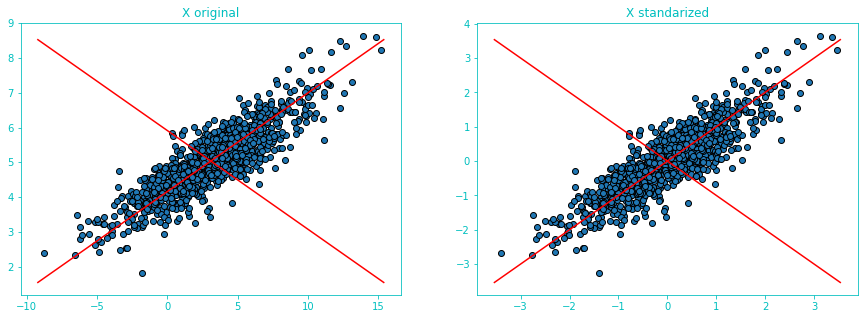

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
axes[0].scatter(X_a[:,0], X_a[:,1], edgecolors='black')
axes[0].set_title('X original')
axes[0].plot([x11, y11], [x12, y12], c='red')
axes[0].plot([x21, y21], [x22, y22], c='red')
axes[1].scatter(X_std[:,0], X_std[:,1], edgecolors='black')
axes[1].set_title('X standarized')
axes[1].plot([x31, y31], [x32, y32], c='red')
axes[1].plot([x41, y41], [x42, y42], c='red')

(-4, 4)

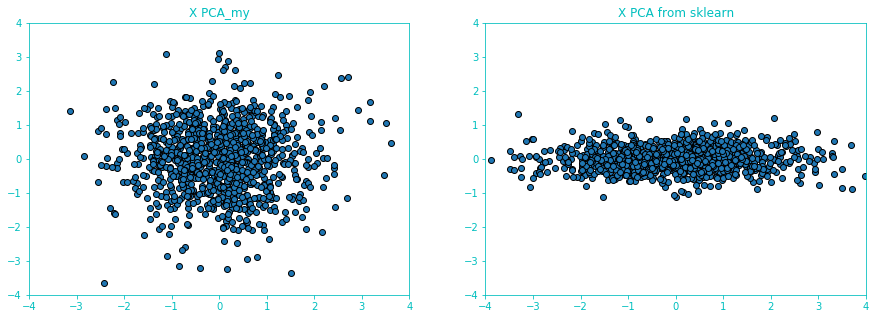

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
axes[0].scatter(y2[:,0], y2[:,1], edgecolors='black')
axes[0].set_title("X PCA_my")
axes[0].set_xlim([-4, 4])
axes[0].set_ylim([-4, 4])
axes[1].scatter(y3[:,0], y3[:,1], edgecolors='black')
axes[1].set_title("X PCA from sklearn")
axes[1].set_xlim([-4, 4])
axes[1].set_ylim([-4, 4])

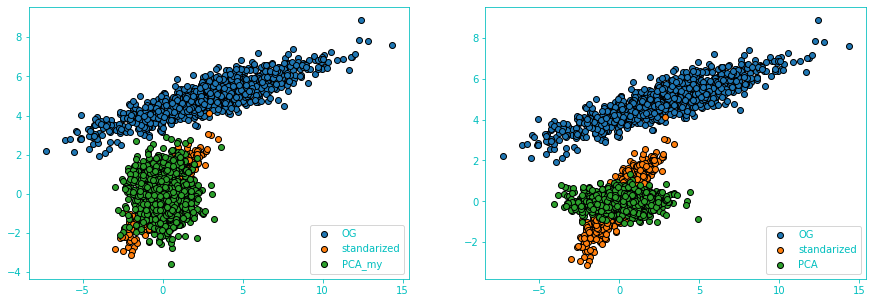

In [27]:
#wszystko razem
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
axes[0].scatter(X_a[:, 0], X_a[:, 1], edgecolors='black', label='OG')
axes[0].scatter(X_std[:, 0], X_std[:, 1], edgecolors='black', label='standarized')
axes[0].scatter(y2[:, 0], y2[:, 1], edgecolors='black', label='PCA_my')
axes[0].legend(loc='lower right')
axes[1].scatter(X_a[:, 0], X_a[:, 1], edgecolors='black', label='OG')
axes[1].scatter(X_std[:, 0], X_std[:, 1], edgecolors='black', label='standarized')
axes[1].scatter(y3[:, 0], y3[:, 1], edgecolors='black', label='PCA')
axes[1].legend(loc='lower right')

g) Sprawdź charakterystykę statystyczną (średnią, wariancję, macierz kowariancji i
macierz korelacji) oryginalnego zbioru danych, zbioru danych po standaryzacji i zbioru
danych po przekształceniu PCA.

In [26]:
print('original X:')
print(f'Mean: {X_a.mean(axis=0)}\n')
print(f'Covariance matrix:\n{np.cov(X_a.T)}\n')
print(f'Correlation matrix:\n{np.corrcoef(X_a.T)}\n')
print("############")
print('X standarized')
print(f'Mean: {X_std.mean(axis=0)}\n')
print(f'Covariance matrix:\n{np.cov(X_std.T)}\n')
print(f'Correlation matrix:\n{np.corrcoef(X_std.T)}\n')
print("############")
print('X PCA')
print(f'Mean: {y2.mean(axis=0)}\n')
print(f'Covariance matrix:\n{np.cov(y2.T)}\n')
print(f'Correlation matrix:\n{np.corrcoef(y2.T)}\n\n')

original X:
Mean: [2.76221217 4.91903384]

Covariance matrix:
[[11.2473812   2.79525619]
 [ 2.79525619  0.93280004]]

Correlation matrix:
[[1.         0.86298179]
 [0.86298179 1.        ]]

############
X standarized
Mean: [6.10400619e-16 2.84217094e-17]

Covariance matrix:
[[1.001001   0.86384564]
 [0.86384564 1.001001  ]]

Correlation matrix:
[[1.         0.86298179]
 [0.86298179 1.        ]]

############
X PCA
Mean: [ 3.34843264e-16 -1.14552812e-15]

Covariance matrix:
[[ 1.00000000e+00 -6.49019266e-17]
 [-6.49019266e-17  1.00000000e+00]]

Correlation matrix:
[[ 1.00000000e+00 -6.49019266e-17]
 [-6.49019266e-17  1.00000000e+00]]




h) Wyjaśnij dlaczego licząc punkty y i dzielimy przez pierwiastki z wartości własnych. Jak
wyglądałyby wyniki f) i g), gdybyśmy nie wykonywali tego dzielenia?

(-3, 3)

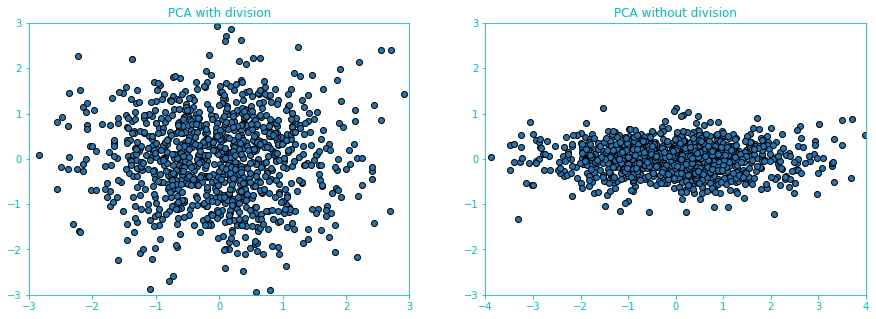

In [15]:
y_no_div = np.dot(X_std, vec)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
axes[0].scatter(y2[:,0], y2[:,1], edgecolors='black')
axes[0].set_title('PCA with division')
axes[0].set_xlim([-3, 3])
axes[0].set_ylim([-3, 3])
axes[1].scatter(y_no_div[:,0], y_no_div[:,1], edgecolors='black')
axes[1].set_title('PCA without division')
axes[1].set_xlim([-4, 4])
axes[1].set_ylim([-3, 3])
#rozjedza sie poziomo

i) Powtórz wszystkie powyższe obliczenia dla zestawu danych X składającego się z 1000
wektorów dwuwymiarowych x i = (x 1i , x 2i ) T , dla i = 1, 2, ..., 1000, wygenerowanych losowo
przy użyciu mieszaniny trzech rozkładów normalnych o średnich [-21, -2], [3, 5], [27, 12],
macierzy kowariancji [12, 3; 3, 1] takiej samej dla wszystkich trzech rozkładów oraz wag
równych dla wszystkich trzech rozkładów wynoszących 1/3.

In [16]:
#to samo dla innych danych
import random
mu2 = [[-21, -2], [3, 5], [27, 12]]
sigma = [[12, 3], [3, 1]]
# a) generacja mieszaniny 3 roznych rozkladow
X2 = np.array([np.random.multivariate_normal(mu2[random.randint(0, 2)], sigma) \
               for _ in range(1000)])
# b) standaryzacja
X2_std = (X2 - X2.mean(axis=0)) / X2.std(axis=0)
# c)  kowariancja
sigma_std2 = np.cov(X2_std.T)
print(f'Cov matrix:\n{sigma_std2}\n')
# d) eigeny
v2, w2 = linalg.eig(sigma_std2)
print(f'Eigenvectors:\n{w2},\n\nEigenvalues: {v2}')
# e) pca
X_pc2 = np.dot(X2_std, np.dot(w2, np.diag(1 / np.sqrt(v2))))

Cov matrix:
[[1.001001   0.99696913]
 [0.99696913 1.001001  ]]

Eigenvectors:
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]],

Eigenvalues: [1.99797013 0.00403187]


Text(0.5, 1.0, 'mieszanina std')

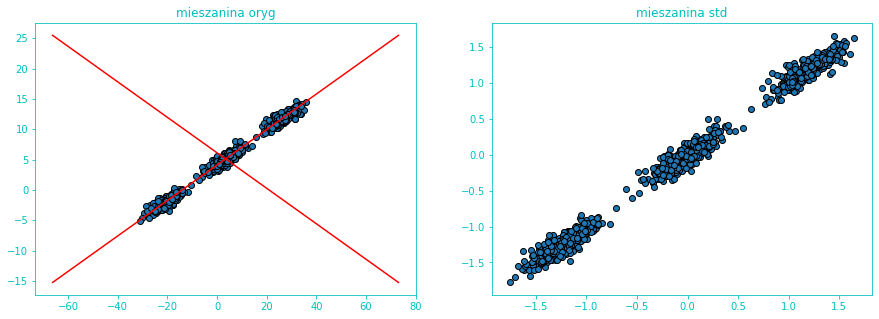

In [36]:
mu = [3,5]
# f)
x11 = X2.mean(axis=0)[0] - mu[1] * w2[0][0] * X2.std(axis=0)[0]
y11 = X2.mean(axis=0)[0] + mu[1] * w2[0][0] * X2.std(axis=0)[0]

x12 = X2.mean(axis=0)[1] - mu[1] * w2[0][1] * X2.std(axis=0)[1]
y12 = X2.mean(axis=0)[1] + mu[1] * w2[0][1] * X2.std(axis=0)[1]


x21 = X2.mean(axis=0)[0] - mu[1] * w2[1][0] * X2.std(axis=0)[0]
y21 = X2.mean(axis=0)[0] + mu[1] * w2[1][0] * X2.std(axis=0)[0]

x22 = X2.mean(axis=0)[1] - mu[1] * w2[1][1] * X2.std(axis=0)[1]
y22 = X2.mean(axis=0)[1] + mu[1] * w2[1][1] * X2.std(axis=0)[1]


x31 = X2_std.mean(axis=0)[0] - mu[1] * w2[0][0] * X2_std.std(axis=0)[0]
y31 = X2_std.mean(axis=0)[0] + mu[1] * w2[0][0] * X_std.std(axis=0)[0]

x32 = X2_std.mean(axis=0)[1] - mu[1] * w2[0][1] * X2_std.std(axis=0)[1]
y32 = X2_std.mean(axis=0)[1] + mu[1] * w2[0][1] * X2_std.std(axis=0)[1]


x41 = X2_std.mean(axis=0)[0] - mu[1] * w2[1][0] * X2_std.std(axis=0)[0]
y41 = X2_std.mean(axis=0)[0] + mu[1] * w2[1][0] * X2_std.std(axis=0)[0]

x42 = X2_std.mean(axis=0)[1] - mu[1] * w2[1][1] * X2_std.std(axis=0)[1]
y42 = X2_std.mean(axis=0)[1] + mu[1] * w2[1][1] * X2_std.std(axis=0)[1]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
axes[0].scatter(X2[:, 0], X2[:, 1], edgecolors='black')
axes[0].plot([x11, y11], [x12, y12], c='red')
axes[0].plot([x21, y21], [x22, y22], c='red')
axes[0].set_title('mieszanina oryg')

axes[1].scatter(X2_std[:, 0], X2_std[:, 1], edgecolors='black')
#axes[1].plot([x31, y31], [x32, y32], c='red')
#axes[1].plot([x41, y41], [x42, y42], c='red')
axes[1].set_title('mieszanina std')

Text(0.5, 1.0, 'mieszanina PCA')

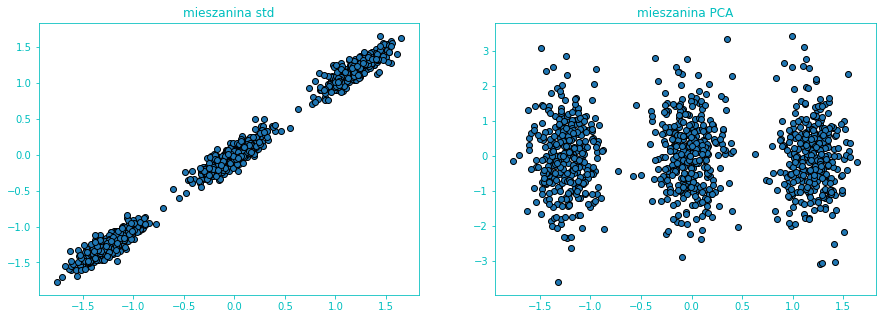

In [35]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
axes[0].scatter(X2_std[:, 0], X2_std[:, 1], edgecolors='black')
axes[0].set_title('mieszanina std')
axes[1].scatter(X_pc2[:, 0], X_pc2[:, 1], edgecolors='black')
axes[1].set_title('mieszanina PCA')

j) Powtórz b), c), d) i e) dla zestawu danych IRIS. Zrób dwuwymiarowy rysunek ilustrujący
zbiór danych IRIS wykreślając na osi x pierwszą składową główną y 1i , a na osi y 2i drugą
składową główną każdego punktu x i .

In [19]:
iris_df = datasets.load_iris()
iris_X = np.array(iris_df.data)
iris_Y = iris_df.target
iris_df = np.c_[np.array(iris_df.data), np.array(iris_df.target, dtype=np.int8)]
iris_df = pd.DataFrame(iris_df, columns=['a', 'b', 'c', 'd', 'target'])

In [38]:
#b) znowu to samo robimy
iris_X_std = (iris_X - iris_X.mean(axis=0)) / iris_X.std(axis=0)
# c)
iris_sigma_std = np.cov(iris_X_std.T)
print(f'Cov matrix STD:\n{iris_sigma_std}\n')
# d)
iris_v, iris_w =linalg.eig(iris_sigma_std)
print(f'Eigenvectors:\n{iris_w},\n\nEigenvalues: {iris_v}')
# e)
iris_X_pc = np.dot(iris_X_std, np.dot(iris_w, np.diag(1 / np.sqrt(iris_v))))
print(f'Cov matrix iris PCA:\n{np.cov(iris_X_pc.T)}\n')

Cov matrix STD:
[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]

Eigenvectors:
[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]],

Eigenvalues: [2.93808505 0.9201649  0.14774182 0.02085386]
Cov matrix iris PCA:
[[ 1.00000000e+00 -1.59849012e-16  4.51491483e-16  4.88684847e-16]
 [-1.59849012e-16  1.00000000e+00 -9.11780325e-16  6.91857868e-16]
 [ 4.51491483e-16 -9.11780325e-16  1.00000000e+00  4.65028000e-15]
 [ 4.88684847e-16  6.91857868e-16  4.65028000e-15  1.00000000e+00]]



Text(0.5, 1.0, 'Iris PCA')

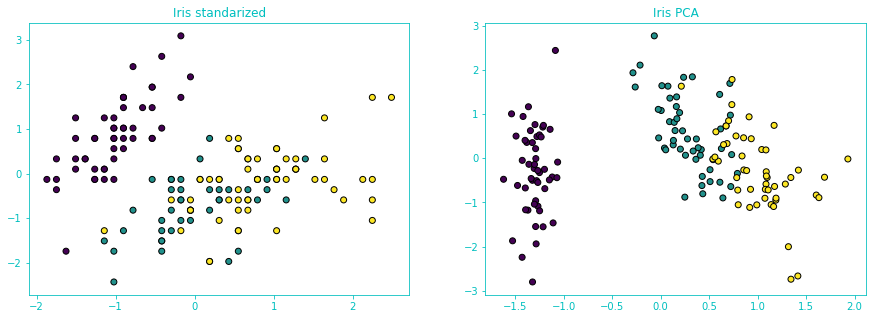

In [21]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
axes[0].scatter(iris_X_std[:, 0], iris_X_std[:, 1], c=iris_Y, edgecolors='black')
axes[0].set_title('Iris standarized')
axes[1].scatter(iris_X_pc[:, 0], iris_X_pc[:, 1], c=iris_Y, edgecolors='black')
axes[1].set_title('Iris PCA')

k) Dla zestawu danych IRIS, spróbuj odtworzyć oryginalne punkty danych x i z danych
zredukowanych do dwóch składowych głównych, tzn. z dwuwymiarowych punktów [y 1i ,
y 2i ] T . Policz średniokwadratowy błąd odtworzenia, tzn. sumę kwadratów odległości między
oryginalnym punktem danych a odtworzonym punktem danych.

Text(0.5, 1.0, 'Iris std')

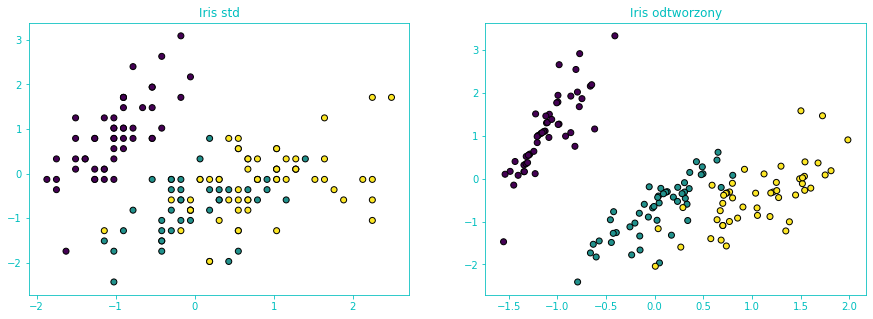

In [42]:
iris_back = np.dot(iris_X_pc * np.sqrt(iris_v), iris_w) # po pca
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
axes[1].scatter(iris_back[:, 0], iris_back[:, 1], c=iris_Y, edgecolors='black')
axes[1].set_title('Iris odtworzony')
axes[0].scatter(iris_X_std[:, 0], iris_X_std[:, 1], c=iris_Y, edgecolors='black')
axes[0].set_title('Iris std')

In [41]:

print(f'Error avg: {np.sum(np.sqrt(np.sum((iris_X_std - iris_back) ** 2, axis=1))) / iris_back.shape[0]}')

Error avg: 2.2048049622779042


l) Jakie znaczenie ma suma wartości własnych macierzy kowariancji S, które zostały użyte
do konstrukcji danych zredukowanych?